In [30]:
import numpy as np
import pandas as pd

In [33]:
# path1 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero/zero_csv/ant1/zero_csvdf_ant1_zero.csv'
# path2 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero/zero_csv/ant2/zero_csvdf_ant2_zero.csv'
# path3 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero/zero_csv/ant3/zero_csvdf_ant3_zero.csv'
# path1 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/45degrees/df_ant1_45_1.csv'
# path2 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/45degrees/df_ant2_45_1.csv'
# path3 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/45degrees/df_ant3_45_1.csv'
# path1 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/30degrees/df_ant1_30_5.csv'
# path2 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/30degrees/df_ant2_30_5.csv'
# path3 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/30degrees/df_ant3_30_5.csv'
path1 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero_degree_zero_posi/df_ant1_0_posi0_1.csv'
path2 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero_degree_zero_posi/df_ant2_0_posi0_1.csv'
path3 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero_degree_zero_posi/df_ant3_0_posi0_1.csv'

df1 = pd.read_csv(path1) # in each channel we have 96 data points per antenna
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

In [34]:
np.max(df1['Magnitude']), np.max(df2['Magnitude']), np.max(df3['Magnitude'])

(991.0852637386956, 650.3306851133506, 1025.0253655397996)

In [35]:
#create two signal samples of different amplitude and phase
ref_sig = df1['I'] + 1j*df1['Q']
sec_sig = df2['I'] + 1j*df2['Q'] 
third_sig = df3['I'] + 1j*df3['Q'] # use this as second reference 

In [36]:
#show angles of samples (arg)
ref_sig_ang = np.angle(ref_sig)
sec_signal_ang = np.angle(sec_sig)
third_signal_ang = np.angle(third_sig)

ref_sig_mag = np.absolute(ref_sig)
sec_sig_mag = np.absolute(sec_sig)
third_sig_mag = np.absolute(third_sig)

In [37]:
#PHASE CORRECTION
#calculate conjungate of second signal
sec_conj = np.conj(sec_sig)
third_conj = np.conj(third_sig)
#multiply conjugate with reference signal
mult_conjg12 = sec_conj*ref_sig # calculating the phase difference from the first and the second antenna
mult_conjg13 = third_conj*ref_sig # 
mult_conjg23 = sec_conj*third_sig # 

In [38]:
#calculate the shift angle corrections
conjg_arg12 = np.angle(mult_conjg12) # phi12
conjg_arg13 = np.angle(mult_conjg13) # phi13
conjg_arg23 = np.angle(mult_conjg23) # phi13

# Create a dataframe from all the important data 
d = {"conj_arg (phi12)": conjg_arg12, "conj_arg (phi13)": conjg_arg13, "conj_arg (phi23)": conjg_arg23}
df = pd.DataFrame(d)

#calculate the normalized coefficient (A = 1) to multiply the seconday signalS
phase_coeff12 = np.exp(1j*conjg_arg12)
phase_coeff13 = np.exp(1j*conjg_arg13)
phase_coeff23 = np.exp(1j*conjg_arg23)

#correcting phase - multiply by phase corrector, the correct signal phase 
# shifted_sec_sig = phase_coeff*sec_sig
df['shifted_sec_sig'] = phase_coeff12*sec_sig 
df['shifted_third_sig'] = phase_coeff13*third_sig
# df['shifted_23_sig'] = phase_coeff23*sec_conj

In [39]:
#calculate corrected signal params
df['shifted_sec_sig_mag'] = np.absolute(df['shifted_sec_sig'])
df['shifted_sec_sig_angle']= np.angle(df['shifted_sec_sig'])
df['shifted_third_sig_mag'] = np.absolute(df['shifted_third_sig'])
df['shifted_third_sig_angle']= np.angle(df['shifted_third_sig'])
# df['shifted_23_sig_mag'] = np.absolute(df['shifted_23_sig'])
# df['shifted_23_sig_angle']= np.angle(df['shifted_23_sig'])

ref_sig_mag = np.absolute(ref_sig)
df['ref_sig_mag'] = ref_sig_mag

# ref_sig3_mag = np.absolute(third_sig)
# df['ref_sig3_mag'] = np.abs(third_sig)

In [40]:
#AMPLITUDE CORRECTION
#*** Simplification - REF signal is considered to always have the greates amplitude, in any other case first perform search for maximum and mark it as reference
#calculate magnitude correction coefficient
mag_coeff12 = (ref_sig_mag-sec_sig_mag)/sec_sig_mag + 1
mag_coeff13 = (ref_sig_mag-third_sig_mag)/third_sig_mag + 1
# mag_coeff23 = (ref_sig3_mag-np.abs(sec_conj))/np.abs(sec_conj) + 1

#muliply sec signal by coeff
amplified_sec_sig = mag_coeff12*df['shifted_sec_sig']
df['amplified_sec_sig'] = amplified_sec_sig
#muliply third signal by coeff
amplified_third_sig = mag_coeff13*df['shifted_third_sig']
df['amplified_third_sig'] = amplified_third_sig
#muliply 23 signal by coeff
# amplified_23_sig = mag_coeff23*df['shifted_23_sig']
# df['amplified_23_sig'] = amplified_23_sig

#calculate corrected signal params
df['amplified_sec_sig_angle'] = np.angle(amplified_sec_sig)
df['amplified_sec_sig_mag'] = np.absolute(amplified_sec_sig)

df['amplified_third_sig_angle'] = np.angle(amplified_third_sig)
df['amplified_third_sig_mag'] = np.absolute(amplified_third_sig)

# df['amplified_23_sig_angle'] = np.angle(amplified_third_sig)
# df['amplified_23_sig_mag'] = np.absolute(amplified_third_sig)

df['ref_sig_angle'] = np.angle(ref_sig)
# df['ref_sig3_angle'] = np.angle(third_sig)

array([<AxesSubplot:>], dtype=object)

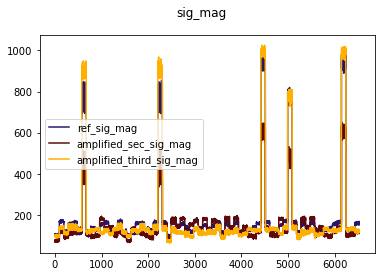

In [41]:
df['ref_sig_mag'].plot(subplots=True, title="sig_mag", color= '#28156c', label='ref_sig_mag', legend=True)
df['shifted_sec_sig_mag'].plot(subplots=True, title="sig_mag", color= '#5f0a0a', label='amplified_sec_sig_mag', legend=True)
df['shifted_third_sig_mag'].plot(subplots=True, title="sig_mag", color= '#ffaf00', label='amplified_third_sig_mag', legend=True)
# df['shifted_23_sig_mag'].plot(subplots=True, title="sig_mag", color= 'b', label='amplified_23_sig_mag', legend=True)

array([<AxesSubplot:>], dtype=object)

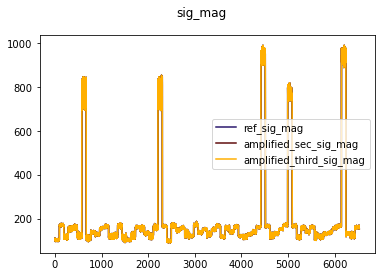

In [42]:
df['ref_sig_mag'].plot(subplots=True, title="sig_mag", color= '#28156c', label='ref_sig_mag', legend=True)
df['amplified_sec_sig_mag'].plot(subplots=True, title="sig_mag", color= '#5f0a0a', label='amplified_sec_sig_mag', legend=True)
df['amplified_third_sig_mag'].plot(subplots=True, title="sig_mag", color= '#ffaf00', label='amplified_third_sig_mag', legend=True)
# df['amplified_23_sig_mag'].plot(subplots=True, title="sig_mag", color= 'b', label='amplified_23_sig_mag', legend=True)

array([<AxesSubplot:>], dtype=object)

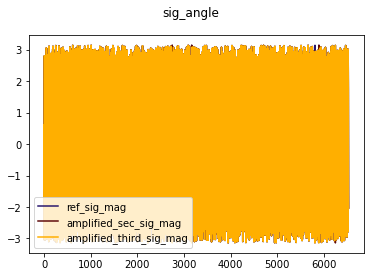

In [43]:
df['ref_sig_angle'].plot(subplots=True, title="sig_angle", color= '#28156c', label='ref_sig_mag', legend=True)
df['shifted_sec_sig_angle'].plot(subplots=True, title="sig_angle", color= '#5f0a0a', label='amplified_sec_sig_mag', legend=True)
df['shifted_third_sig_angle'].plot(subplots=True, title="sig_angle", color= '#ffaf00', label='amplified_third_sig_mag', legend=True)
# df['shifted_23_sig_angle'].plot(subplots=True, title="sig_angle", color= 'b', label='amplified_23_sig_mag', legend=True)

In [44]:
print(np.average(df['ref_sig_angle']) * 180/np.pi, np.average(df['shifted_sec_sig_angle']) * 180/np.pi, np.average(df['shifted_third_sig_angle']) * 180/np.pi,
     '\n ant2 from reference', np.average(df['shifted_third_sig_angle']) * 180/np.pi- np.average(df['ref_sig_angle']) * 180/np.pi,
     '\n ant3 from reference', np.average(df['shifted_sec_sig_angle']) * 180/np.pi- np.average(df['ref_sig_angle']) * 180/np.pi,)

0.6068812700267412 0.49658715237968226 0.38629303473262316 
 ant2 from reference -0.22058823529411803 
 ant3 from reference -0.11029411764705893


In [45]:
df

,conj_arg (phi12),conj_arg (phi13),conj_arg (phi23),shifted_sec_sig,shifted_third_sig,shifted_sec_sig_mag,shifted_sec_sig_angle,shifted_third_sig_mag,shifted_third_sig_angle,ref_sig_mag,amplified_sec_sig,amplified_third_sig,amplified_sec_sig_angle,amplified_sec_sig_mag,amplified_third_sig_angle,amplified_third_sig_mag,ref_sig_angle
0,2.601791,-2.950187,-0.731208,57.770338+39.994850j,81.728551+56.581304j,70.263789,0.605545,99.403219,0.605545,110.679718,91.00+63.00j,91.00+63.00j,0.605545,110.679718,0.605545,110.679718,0.605545
1,2.558534,-2.989085,-0.735567,72.323048+13.393157j,96.406777+17.853107j,73.552702,0.183111,98.045908,0.183111,109.836242,108.0+20.0j,108.0+20.0j,0.183111,109.836242,0.183111,109.836242,0.183111
2,2.562812,-2.993806,-0.726567,76.716737-17.875745j,95.309013-22.207925j,78.771822,-0.228925,97.862148,-0.228925,105.759160,103.0-24.0j,103.0-24.0j,-0.228925,105.759160,-0.228925,105.759160,-0.228925
3,2.430529,-3.064898,-0.787758,60.718477-53.621512j,72.089767-63.663690j,81.006173,-0.723409,96.176920,-0.723409,102.727796,77.00-68.00j,77.00-68.00j,-0.723409,102.727796,-0.723409,102.727796,-0.723409
4,2.538484,-2.922776,-0.821925,-74.1697140-7.2009430j,-106.294406-10.319845j,74.518454,-3.044809,106.794195,-3.044809,103.484298,-103.0-10.0j,-103.0-10.0j,-3.044809,103.484298,-3.044809,103.484298,-3.044809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6523,2.861360,3.115693,-0.254334,-19.693121+115.970604j,-19.962404+117.556380j,117.630778,1.739003,119.239255,1.739003,161.276161,-27.0+159.0j,-27.0+159.0j,1.739003,161.276161,1.739003,161.276161,1.739003
6524,2.767092,-3.139149,-0.376945,88.873381-80.059492j,95.209884-85.767581j,119.616052,-0.733272,128.144450,-0.733272,162.855764,121.0-109.0j,121.0-109.0j,-0.733272,162.855764,-0.733272,162.855764,-0.733272
6525,2.754674,3.128927,-0.374253,49.249733-109.692588j,50.577367-112.649589j,120.241424,-1.148791,123.482792,-1.148791,161.136588,66.0-147.0j,66.0-147.0j,-1.148791,161.136588,-1.148791,161.136588,-1.148791
6526,2.803411,-3.128854,-0.350920,1.519222-119.258928j,1.57949-0123.989940j,119.268604,-1.558058,124.000000,-1.558058,157.012738,2.0-0157.00j,2.0-0157.00j,-1.558058,157.012738,-1.558058,157.012738,-1.558058


In [46]:
np.average(df['ref_sig_mag']) , np.average(df['shifted_sec_sig_mag']), np.average(df['shifted_third_sig_mag'])

(193.46264662497435, 156.07972821631563, 179.15587840030116)

In [47]:
df['mag_coeff12'] = mag_coeff12
df['mag_coeff13'] = mag_coeff12
# df['mag_coeff23'] = mag_coeff12

array([<AxesSubplot:>], dtype=object)

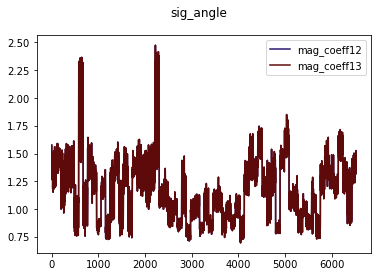

In [48]:
df['mag_coeff12'].plot(subplots=True, title="sig_angle", color= '#28156c', label='mag_coeff12', legend=True)
df['mag_coeff13'].plot(subplots=True, title="sig_angle", color= '#5f0a0a', label='mag_coeff13', legend=True)
# df['mag_coeff23'].plot(subplots=True, title="sig_angle", color= '#ffaf00', label='mag_coeff23', legend=True)

In [49]:
# Calculate this coefficient per channel! 
phi_channel = []
for i in range(0, len(df),96):
    phi_channel.append({"channel":df1['Channel'][i], "mag_coeff12" : np.average(df['mag_coeff12'][i:i+96]),
                         "mag_coeff13" : np.average(df['mag_coeff13'][i:i+96]), 
                        "ref_sig_angle": np.average(df['ref_sig_angle'][i:i+96]),     
                       "shifted_sec_sig_angle": np.average(df['shifted_sec_sig_angle'][i:i+96]),
                       "shifted_third_sig_angle": np.average(df['shifted_third_sig_angle'][i:i+96])})
average_perchannel = pd.DataFrame(phi_channel)

array([<AxesSubplot:>], dtype=object)

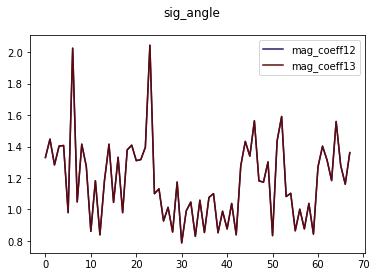

In [50]:
average_perchannel['mag_coeff12'].plot(subplots=True, title="sig_angle", color= '#28156c', label='mag_coeff12', legend=True)
average_perchannel['mag_coeff13'].plot(subplots=True, title="sig_angle", color= '#5f0a0a', label='mag_coeff13', legend=True)
# average_perchannel['mag_coeff23'].plot(subplots=True, title="sig_angle", color= '#ffaf00', label='mag_coeff23', legend=True)

array([<AxesSubplot:>], dtype=object)

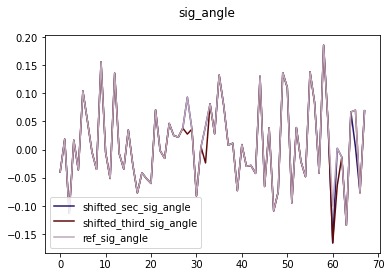

In [51]:
average_perchannel['shifted_sec_sig_angle'].plot(subplots=True, title="sig_angle", color= '#28156c', label='shifted_sec_sig_angle', legend=True)
average_perchannel['shifted_third_sig_angle'].plot(subplots=True, title="sig_angle", color= '#5f0a0a', label='shifted_third_sig_angle', legend=True)
# average_perchannel['shifted_23_sig_angle'].plot(subplots=True, title="sig_angle", color= '#ffaf00', label='shifted_23_sig_angle', legend=True)
average_perchannel['ref_sig_angle'].plot(subplots=True, title="sig_angle", color= '#bea7ba', label='ref_sig_angle', legend=True)
# average_perchannel['ref_sig3_angle'].plot(subplots=True, title="sig_angle", color= '#7bae3f', label='ref_sig3_angle', legend=True)

array([<AxesSubplot:>], dtype=object)

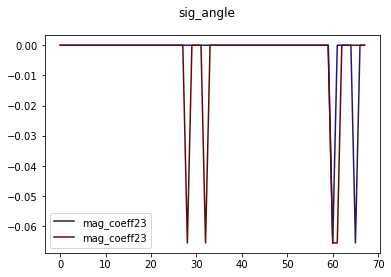

In [52]:
(average_perchannel['shifted_sec_sig_angle'] - average_perchannel['ref_sig_angle']).plot(subplots=True, title="sig_angle", color= '#28156c', label='mag_coeff23', legend=True)
(average_perchannel['shifted_third_sig_angle'] - average_perchannel['ref_sig_angle']).plot(subplots=True, title="sig_angle", color= '#5f0a0a', label='mag_coeff23', legend=True)
# (average_perchannel['shifted_23_sig_angle'] - average_perchannel['ref_sig3_angle']).plot(subplots=True, title="sig_angle", color= '#ffaf00', label='mag_coeff23', legend=True)

In [53]:
print(np.average(average_perchannel['shifted_sec_sig_angle'])*180/np.pi,
     '\n', np.average(average_perchannel['shifted_third_sig_angle'])*180/np.pi)

0.49658715237968265 
 0.3862930347326235


In [54]:
average_perchannel['shifted_sec_sig_angle'].std(), average_perchannel['shifted_third_sig_angle'].std()

(0.0738265651657013, 0.07400934486714636)

# info:
shifted second/third signal is basically the corrected signal.  
[if finding a reference signal, this can improve, however, we have no reference signal now!]   
[maybe if having a master, and  a passive, we end up having the reference signal as well]  
after calculating the corrected signal, we can now calculate the phase diffrence between this signal and the ref signal. meaning that we have to calc:  
deltaphi12 = (I1+jQ1).(I2_shifted+ jQ2_shifted)*  

deltaphi23 = (I2_shifted+ jQ2_shifted).(I3_shifted+ jQ3_shifted)*  

deltaphi13 = (I1+jQ1).(I3_shifted+ jQ3_shifted)*  

In [55]:
deltaphi12 = (df1['I'] + 1j*df1['Q'])*np.conj(df['shifted_sec_sig'])
deltaphi12_test = (df1['I'] + 1j*df1['Q'])*np.conj(df['amplified_sec_sig'])
angle12_test = np.angle(deltaphi12_test)
angle12 = np.angle(deltaphi12)

In [56]:
deltaphi12[0], deltaphi12_test[0], np.angle(deltaphi12[0], deg= True), np.angle(deltaphi12_test[0])

((7776.776324416178+1.3642420526593924e-12j),
 (12249.999999999998+1.8189894035458565e-12j),
 1.0051119974511477e-14,
 1.484889309017026e-16)

In [57]:
np.average(angle12), np.average(angle12_test)

(-8.957177276731013e-19, -6.341082513465508e-19)

In [58]:
angle12_test

array([ 1.48488931e-16, -1.13083725e-16,  4.06568932e-17, ...,
        0.00000000e+00, -2.12128120e-16, -7.64120732e-17])

In [59]:
deltaphi12 = (df['shifted_third_sig'])*np.conj(df['shifted_sec_sig'])
deltaphi12_test = (df['amplified_third_sig'])*np.conj(df['amplified_sec_sig'])
angle12_test = np.angle(deltaphi12_test)
angle12 = np.angle(deltaphi12)

In [60]:
np.average(angle12), np.average(angle12_test)

(-3.315658685696659e-18, -2.8392197943729347e-18)